<a href="https://colab.research.google.com/github/Aguilar78/Inteligencia-artificial-y-Redes-Neuronales/blob/main/ACTIVIDADES/AF8_RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AF 8: Redes Neuronales Convolucionales-LMV-N4-Grupo 008
Dario Israel Barrera Martinez 2067873

Arturo Estébanez Gómez Pérez 2127977

Jose Eduardo Aguilar Morales 2174012

Christopher Yair Lopez Zavala 2177846

Hector Alan Malagon Villareal 2178017

Ricardo Alfredo Zumaya Osorio 2178139

**1.- Cargar librerias**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

**2.- Cargar datos**

In [2]:
# Cargar los datos
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# Normalizar los datos (convertir de 0-255 a 0-1)
train_data = train_data.astype('float32') / 255.0
test_data = test_data.astype('float32') / 255.0

# Ajustar forma para la red convolucional (28x28x1)
train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

# Convertir etiquetas a one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**3.- Crear red neuronal convolucional**

In [3]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Capa de salida
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**4.- Compilacion del modelo**

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**5.-Entrenar al modelo**

In [25]:
model.fit(train_data, train_labels_cat, epochs=5, batch_size=128, verbose=1)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9976 - loss: 0.0067
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9984 - loss: 0.0050
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9987 - loss: 0.0039
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9983 - loss: 0.0050
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9987 - loss: 0.0035


**6.- Evaluar el modelo**

In [38]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, verbose=0)
print(f'Exactitud en datos de prueba: {test_accuracy * 100:.2f}%')

Exactitud en datos de prueba: 99.17%


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8131 - loss: 0.6766 - val_accuracy: 0.9454 - val_loss: 0.1887
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9510 - loss: 0.1705 - val_accuracy: 0.9580 - val_loss: 0.1442
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9659 - loss: 0.1147 - val_accuracy: 0.9681 - val_loss: 0.1095
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9764 - loss: 0.0831 - val_accuracy: 0.9706 - val_loss: 0.0995
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9798 - loss: 0.0662 - val_accuracy: 0.9726 - val_loss: 0.0911
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9851 - loss: 0.0506 - val_accuracy: 0.9729 - val_loss: 0.0910
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0395 - val_accuracy: 0.9729 - val_loss: 0.0895
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0352 - val_accuracy: 0.

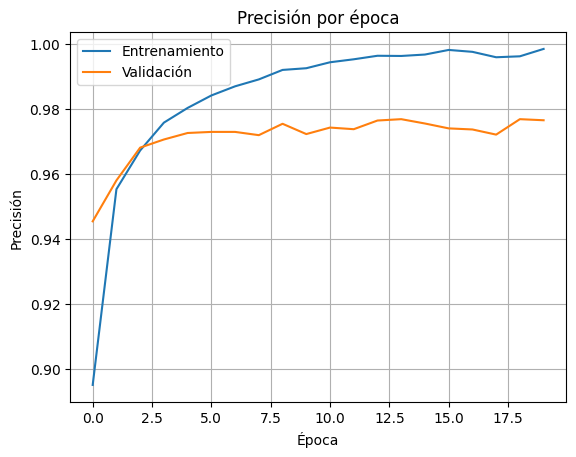

In [36]:
# Definir el modelo (red neuronal artificial prealimentada)
modelo = Sequential([
    Flatten(input_shape=(28, 28)),          # Aplanar la imagen de entrada
    Dense(128, activation='relu'),          # Capa oculta con 128 neuronas
    Dense(64, activation='relu'),           # Otra capa oculta con 64 neuronas
    Dense(10, activation='softmax')         # Capa de salida para 10 clases
])

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Entrenar el modelo
history = modelo.fit(train_data, train_labels_cat,
                     epochs=20,
                     validation_split=0.2,
                     batch_size=128)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = modelo.evaluate(test_data, test_labels_cat, verbose=0)
print(f"Exactitud en el conjunto de prueba: {test_accuracy * 100:.2f}%")

# Guardar el modelo en formato .keras
modelo.save("modelo_mnist.keras")

# Graficar precisión por época
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión por época')
plt.legend()
plt.grid()
plt.show()

**7.- 5 Predicciones y muestra de resultados**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


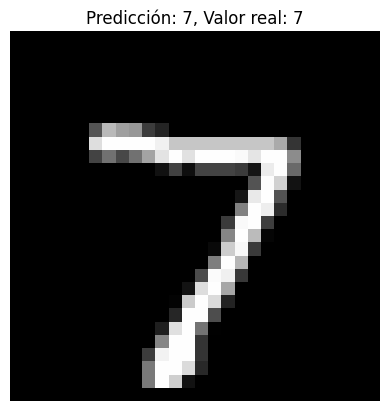

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


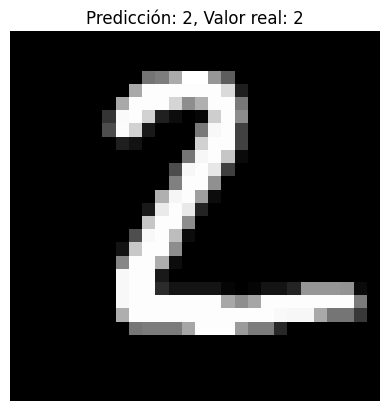

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


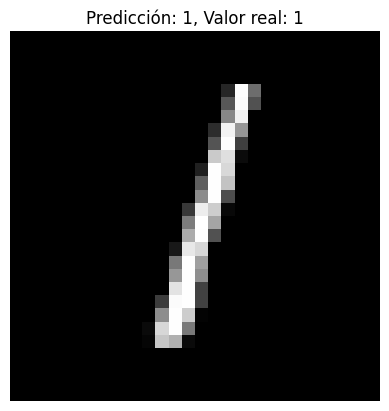

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


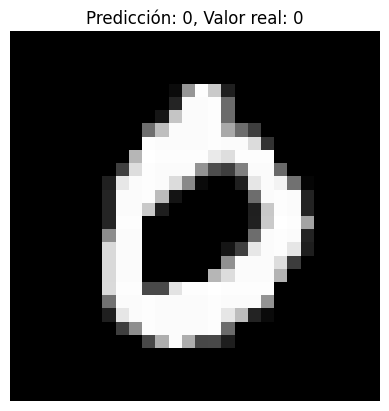

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


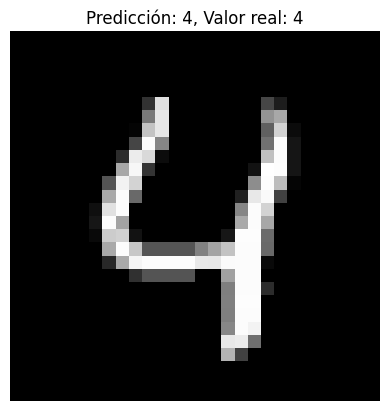

In [37]:
# Seleccionamos 5 muestras del conjunto de prueba
for i in range(5):
    sample = np.expand_dims(test_data[i], axis=0)
    prediction = model.predict(sample)
    predicted_label = np.argmax(prediction)
    true_label = test_labels[i]

    plt.imshow(test_data[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicción: {predicted_label}, Valor real: {true_label}')
    plt.axis('off')
    plt.show()
